In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
coordinates = zip(lats, lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
#(6.2.6)

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bf7bc81663d1312a8049cf0f4ccc6065


In [9]:
# Import the datetime module from the datetime library
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url +"&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | kruisfontein
Processing Record 2 of Set 13 | mar del plata
Processing Record 3 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 13 | saldanha
Processing Record 5 of Set 13 | new norfolk
Processing Record 6 of Set 13 | saint george
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | stonewall
Processing Record 9 of Set 13 | ushuaia
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | barrow
Processing Record 12 of Set 13 | axim
Processing Record 13 of Set 13 | cape town
Processing Record 14 of Set 13 | chokurdakh
Processing Record 15 of Set 13 | ruian
City not found. Skipping...
Processing Record 16 of Set 13 | uray
Processing Record 17 of Set 13 | batemans bay
Processing Record 18 of Set 13 | myitkyina
Processing Record 19 of Set 13 | srednekolymsk
Processing Record 20 of Set 13 | east london
Processing Record 21 of Set 13 | gar

Processing Record 33 of Set 16 | dingle
Processing Record 34 of Set 16 | dikson
Processing Record 35 of Set 16 | airai
Processing Record 36 of Set 16 | vila velha
Processing Record 37 of Set 16 | porto belo
Processing Record 38 of Set 16 | narsaq
Processing Record 39 of Set 16 | grand centre
City not found. Skipping...
Processing Record 40 of Set 16 | cabo san lucas
Processing Record 41 of Set 16 | davila
Processing Record 42 of Set 16 | guerrero negro
Processing Record 43 of Set 16 | port augusta
Processing Record 44 of Set 16 | coquimbo
Processing Record 45 of Set 16 | lethem
Processing Record 46 of Set 16 | avera
Processing Record 47 of Set 16 | mizdah
Processing Record 48 of Set 16 | inhambane
Processing Record 49 of Set 16 | caravelas
Processing Record 50 of Set 16 | kharovsk
Processing Record 1 of Set 17 | yuncheng
Processing Record 2 of Set 17 | kaduna
Processing Record 3 of Set 17 | mahebourg
Processing Record 4 of Set 17 | barawe
City not found. Skipping...
Processing Record 5

Processing Record 18 of Set 20 | kembe
Processing Record 19 of Set 20 | ganzhou
Processing Record 20 of Set 20 | mumbwa
Processing Record 21 of Set 20 | buala
Processing Record 22 of Set 20 | trincomalee
Processing Record 23 of Set 20 | ossora
Processing Record 24 of Set 20 | choma
Processing Record 25 of Set 20 | berlevag
Processing Record 26 of Set 20 | manta
Processing Record 27 of Set 20 | bolkhov
Processing Record 28 of Set 20 | aklavik
Processing Record 29 of Set 20 | verkhnyaya inta
Processing Record 30 of Set 20 | umea
Processing Record 31 of Set 20 | yatou
Processing Record 32 of Set 20 | thaba-tseka
Processing Record 33 of Set 20 | magdalena
Processing Record 34 of Set 20 | tutoia
Processing Record 35 of Set 20 | paso de los toros
Processing Record 36 of Set 20 | muyezerskiy
Processing Record 37 of Set 20 | det udom
Processing Record 38 of Set 20 | great yarmouth
Processing Record 39 of Set 20 | kondinskoye
Processing Record 40 of Set 20 | mehamn
Processing Record 41 of Set 2

Processing Record 3 of Set 24 | mezhova
Processing Record 4 of Set 24 | bama
Processing Record 5 of Set 24 | tromso
Processing Record 6 of Set 24 | rolim de moura
City not found. Skipping...
Processing Record 7 of Set 24 | izumrud
Processing Record 8 of Set 24 | soyo
Processing Record 9 of Set 24 | maniwaki
Processing Record 10 of Set 24 | bahia honda
Processing Record 11 of Set 24 | ostersund
Processing Record 12 of Set 24 | yerofey pavlovich
Processing Record 13 of Set 24 | ibra
Processing Record 14 of Set 24 | kailua
Processing Record 15 of Set 24 | burgeo
Processing Record 16 of Set 24 | glubokoe
City not found. Skipping...
Processing Record 17 of Set 24 | timra
Processing Record 18 of Set 24 | simao
Processing Record 19 of Set 24 | bocaiuva
Processing Record 20 of Set 24 | ribeira brava
Processing Record 21 of Set 24 | lamu
Processing Record 22 of Set 24 | berck
Processing Record 23 of Set 24 | hay river
Processing Record 24 of Set 24 | yumen
Processing Record 25 of Set 24 | shihe

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,52.88,81,100,13.69,ZA,2021-09-29 21:20:20
1,Mar Del Plata,-38.0023,-57.5575,59.00,52,0,30.00,AR,2021-09-29 21:19:28
2,Saldanha,-33.0117,17.9442,59.05,75,76,14.83,ZA,2021-09-29 21:20:21
3,New Norfolk,-42.7826,147.0587,49.71,70,100,1.72,AU,2021-09-29 21:18:05
4,Saint George,37.1041,-113.5841,77.47,30,1,3.00,US,2021-09-29 21:20:22
5,Atuona,-9.8000,-139.0333,77.67,76,42,19.37,PF,2021-09-29 21:20:22
6,Stonewall,50.1344,-97.3268,88.75,29,94,15.75,CA,2021-09-29 21:20:23
7,Ushuaia,-54.8000,-68.3000,44.26,61,75,16.11,AR,2021-09-29 21:20:23
8,Rikitea,-23.1203,-134.9692,73.27,68,100,17.65,PF,2021-09-29 21:20:23
9,Barrow,71.2906,-156.7887,30.22,80,90,9.22,US,2021-09-29 21:18:02


In [11]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order_df = city_data_df[new_column_order]
new_column_order_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2021-09-29 21:20:20,-34.0033,24.7314,52.88,81,100,13.69
1,Mar Del Plata,AR,2021-09-29 21:19:28,-38.0023,-57.5575,59.00,52,0,30.00
2,Saldanha,ZA,2021-09-29 21:20:21,-33.0117,17.9442,59.05,75,76,14.83
3,New Norfolk,AU,2021-09-29 21:18:05,-42.7826,147.0587,49.71,70,100,1.72
4,Saint George,US,2021-09-29 21:20:22,37.1041,-113.5841,77.47,30,1,3.00
...,...,...,...,...,...,...,...,...,...
548,Asyut,EG,2021-09-29 21:23:09,27.1810,31.1837,78.13,36,0,8.61
549,Khandyga,RU,2021-09-29 21:23:09,62.6667,135.6000,34.32,54,100,4.76
550,Nanortalik,GL,2021-09-29 21:23:10,60.1432,-45.2371,36.12,68,3,9.08
551,Grootfontein,NA,2021-09-29 21:23:10,-19.5667,18.1167,71.17,18,18,4.61


In [12]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1632952038.8632836

In [16]:
today = time.strftime("%x")
today

'09/29/21'

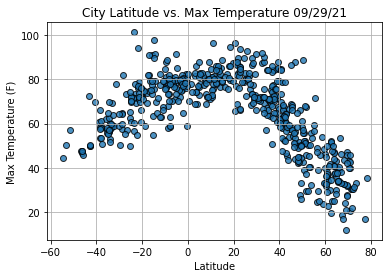

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

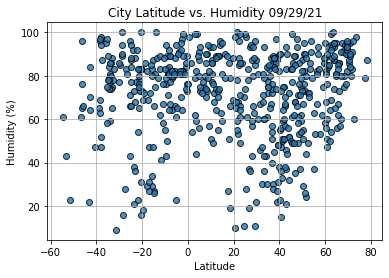

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

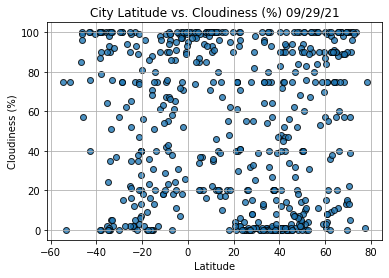

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()